<a href="https://colab.research.google.com/github/Svarich-11908/machine-learning/blob/main/11_009_Svarich_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ДЗ №1

1. Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.

In [12]:
from google.colab import files

uploaded = files.upload()

Saving 15558029451763393.jpg to 15558029451763393.jpg


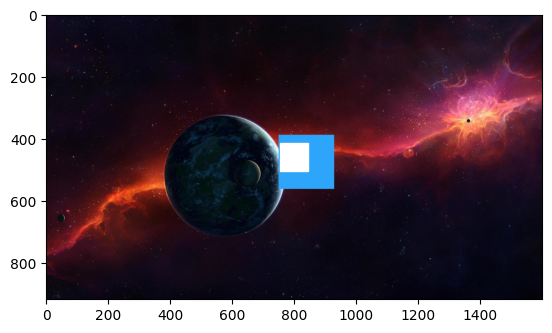

In [13]:
from skimage.io import imread
import matplotlib.pyplot as plt

orig_img = imread('15558029451763393.jpg')

fig, ax = plt.subplots()
height, width, _ = orig_img.shape
square_size = min(height, width) * 0.1

top_left_y = (height - square_size) // 2
top_left_x = (width - square_size) // 2

ax.add_patch(plt.Rectangle((top_left_x,top_left_y ), square_size, square_size, fill=True, color='white'))
ax.imshow(orig_img)
plt.show()

## ДЗ №2

1. Поместить в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Спасибо.mp4 to Спасибо.mp4


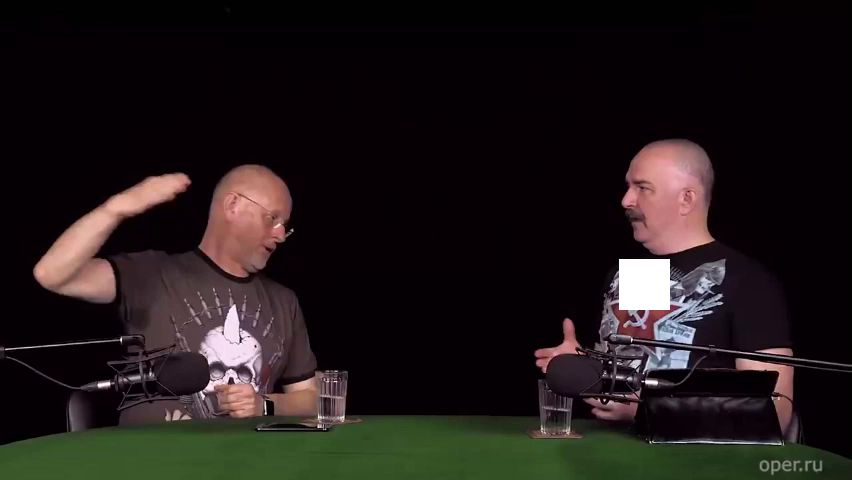

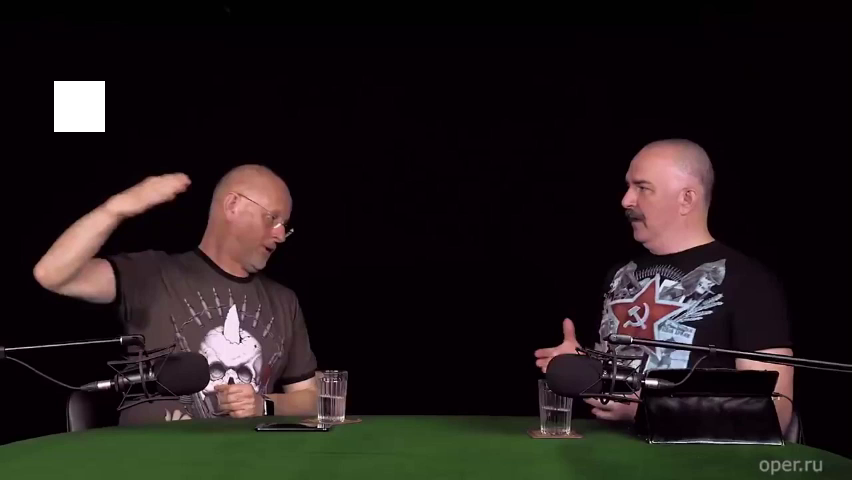

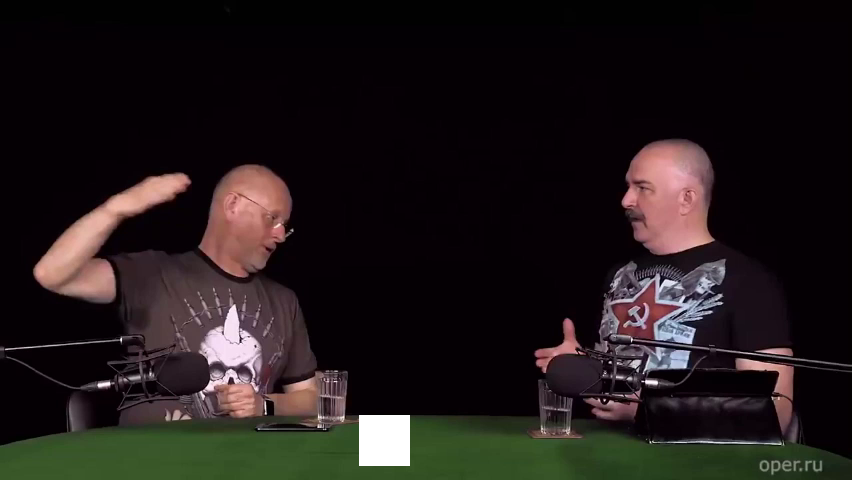

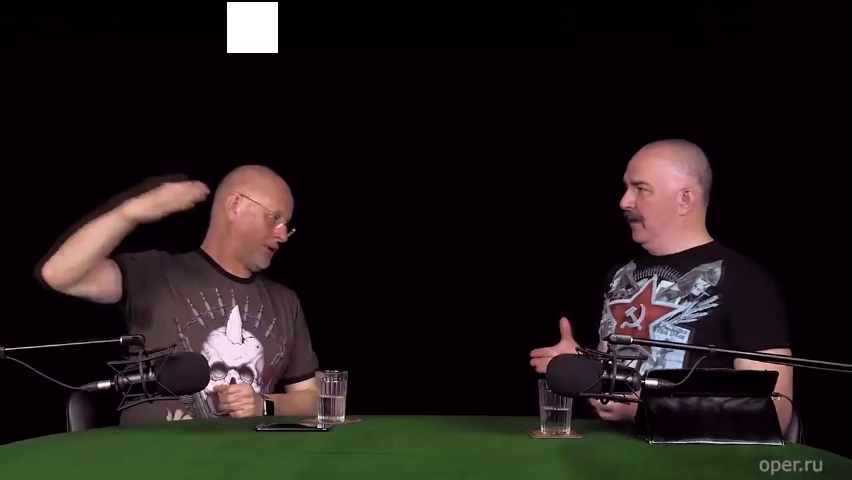

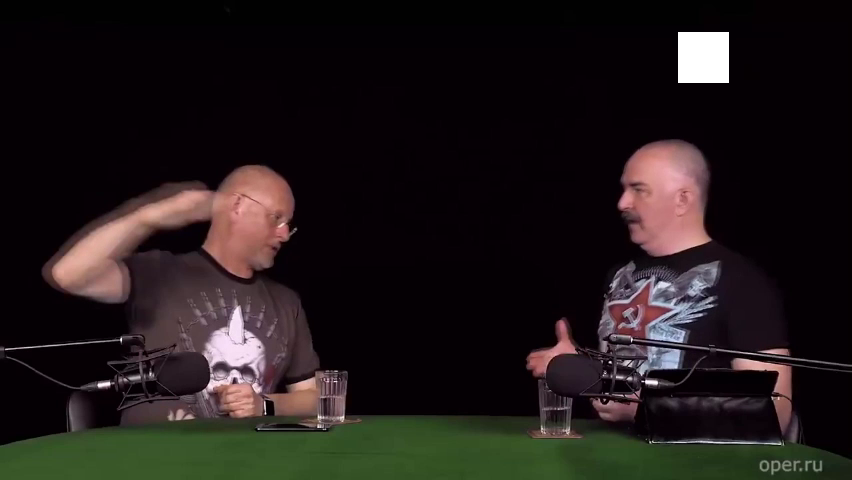

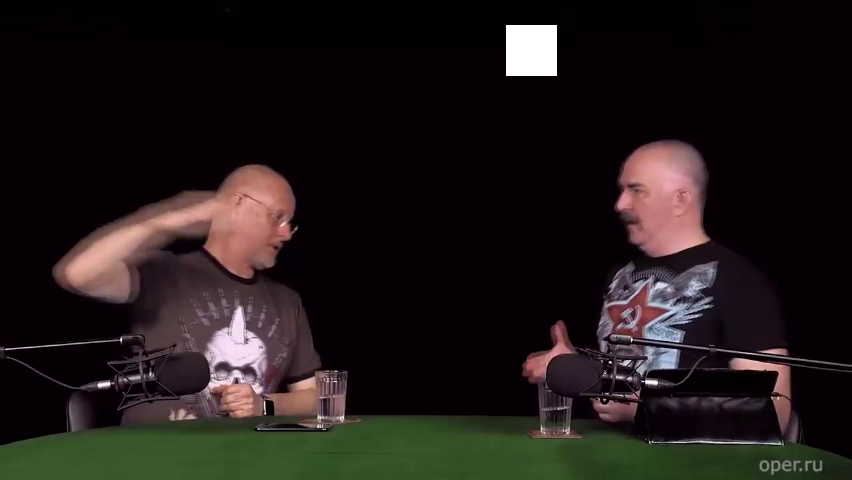

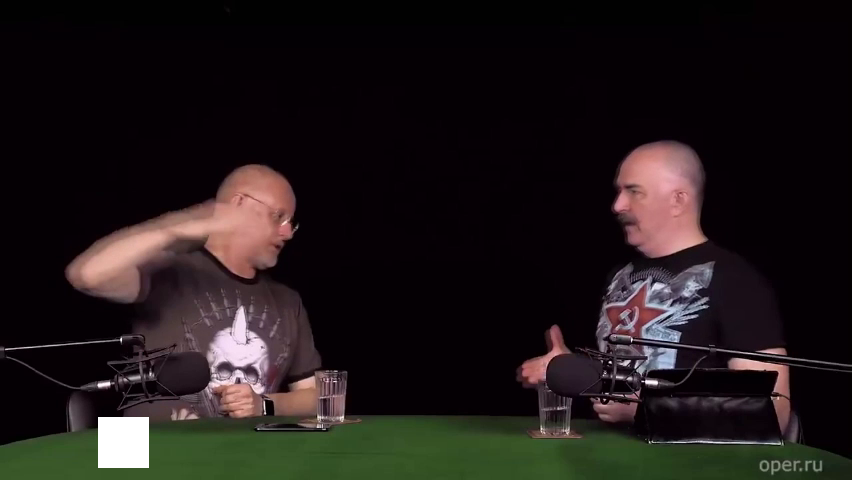

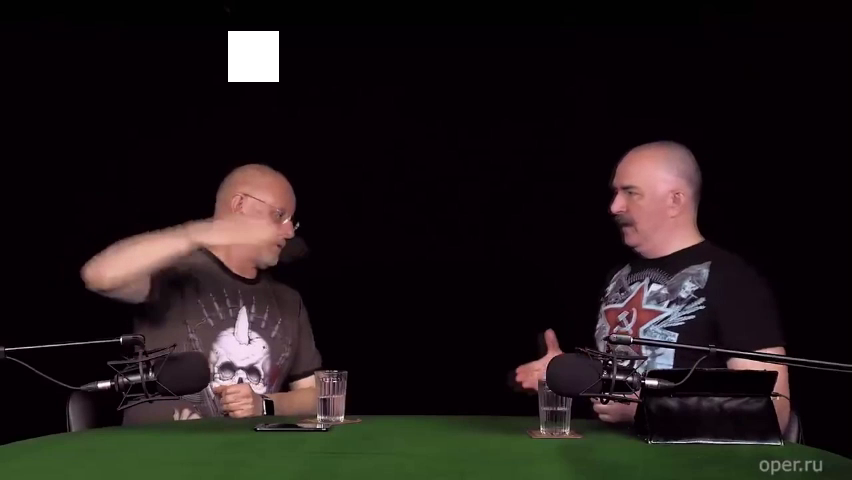

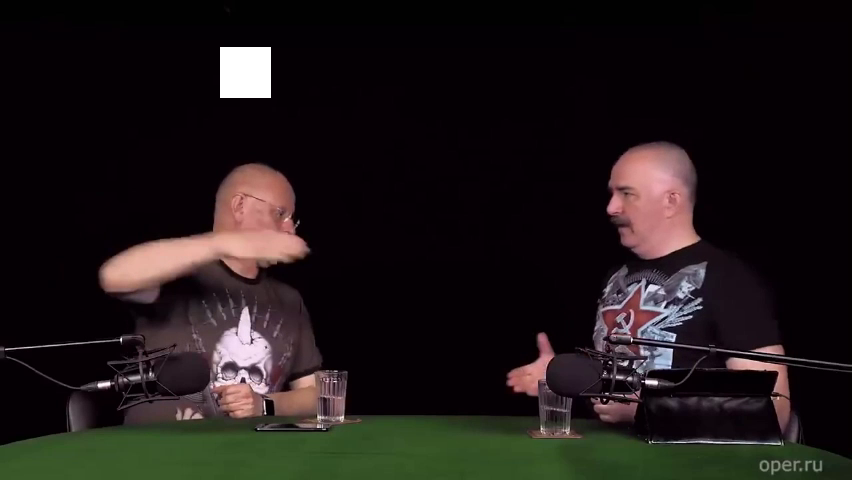

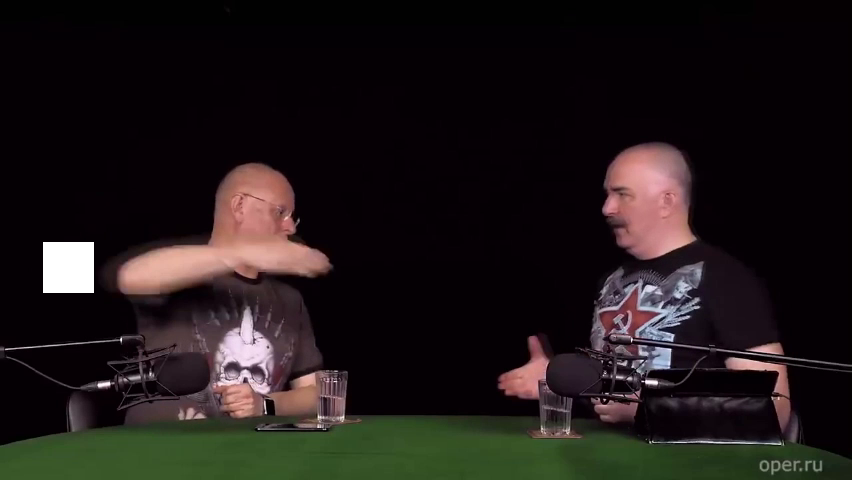

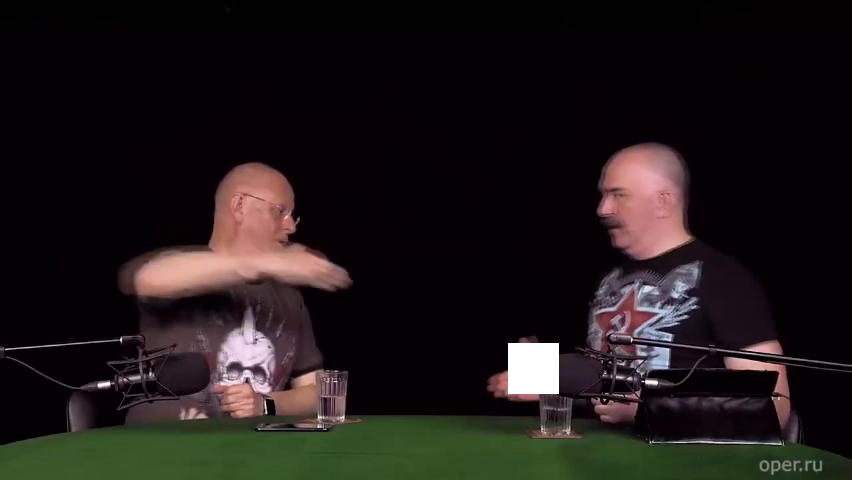

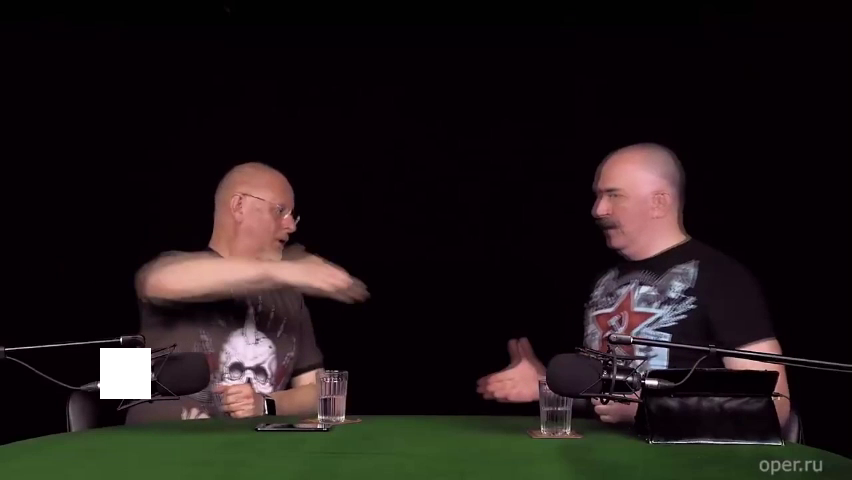

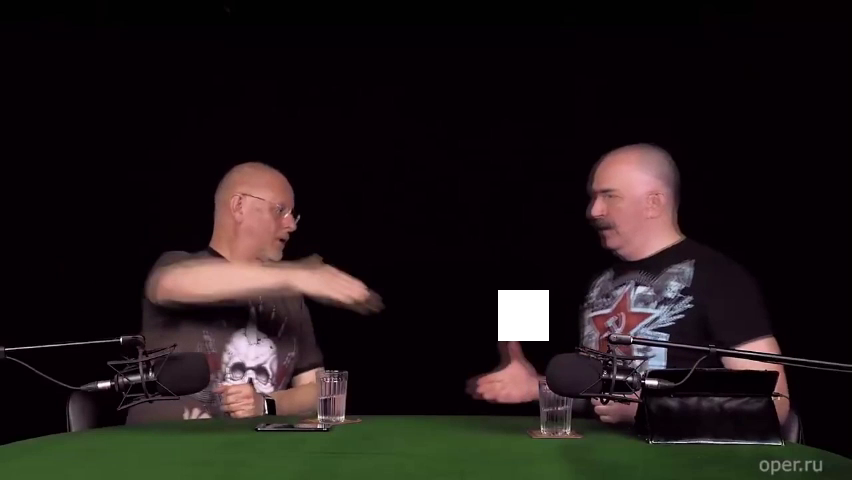

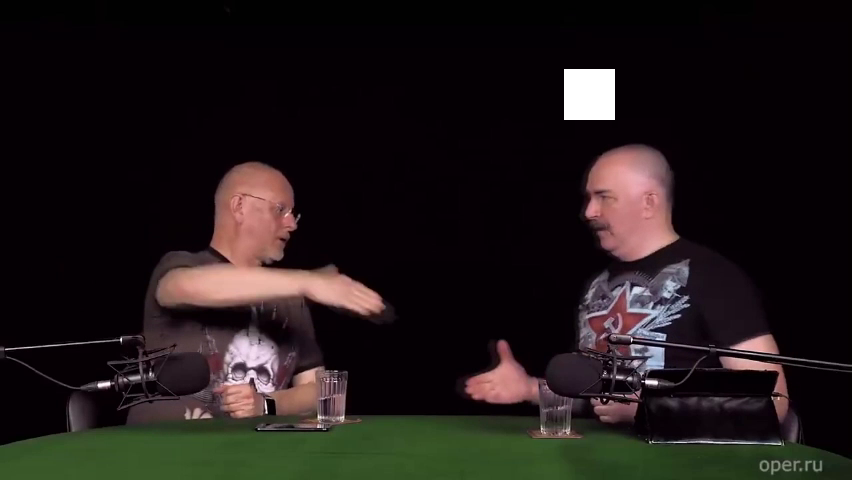

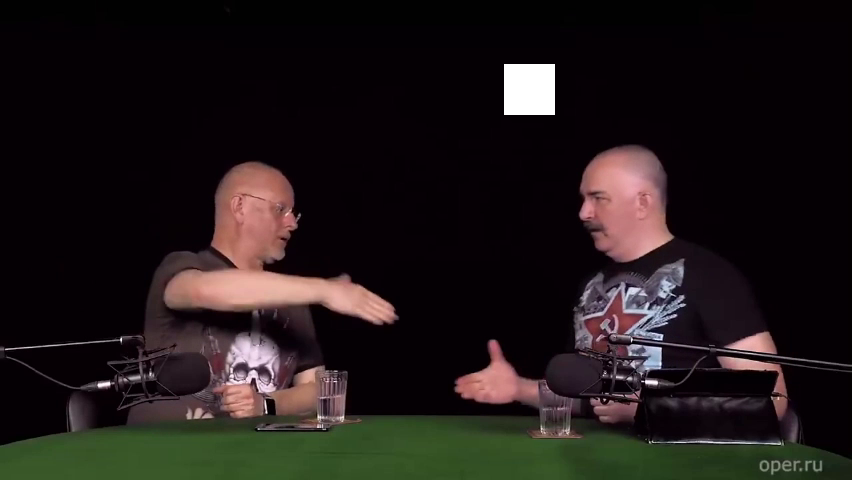

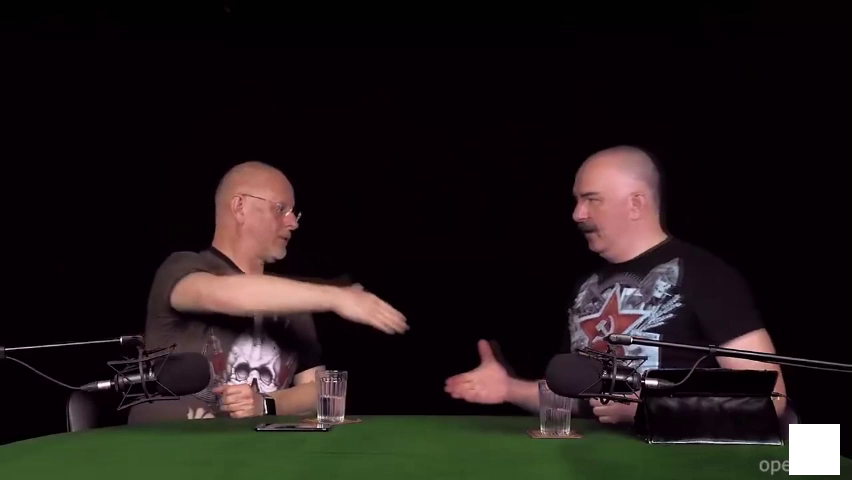

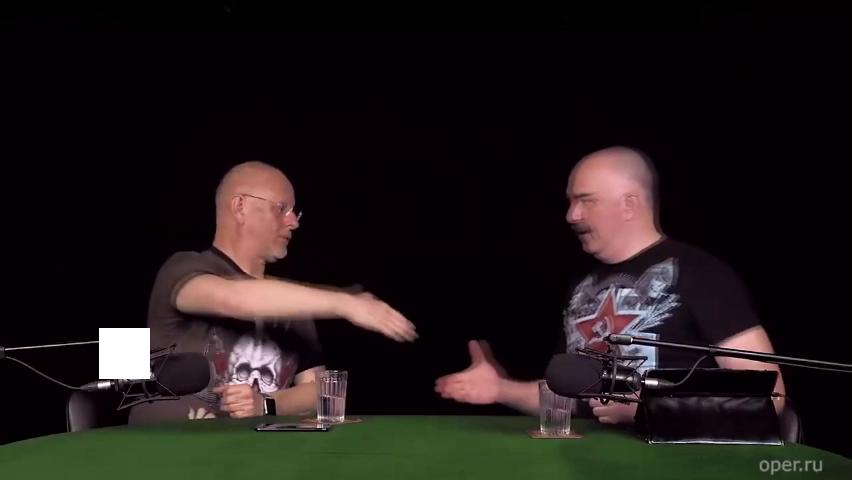

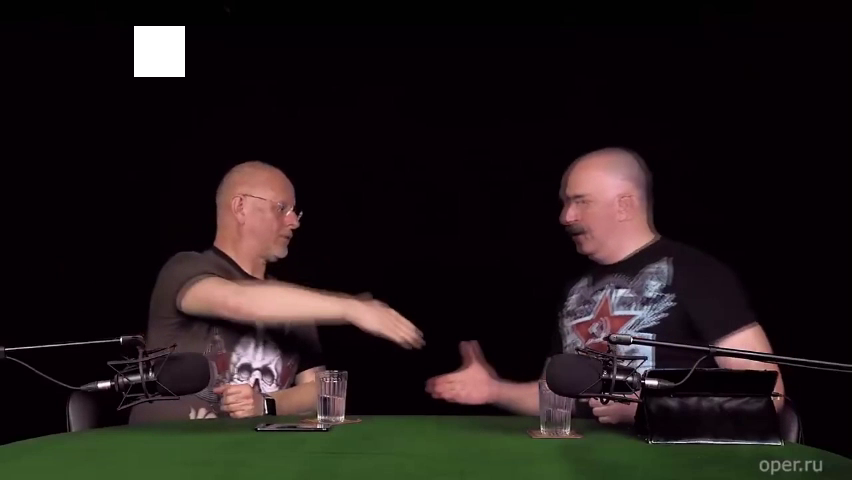

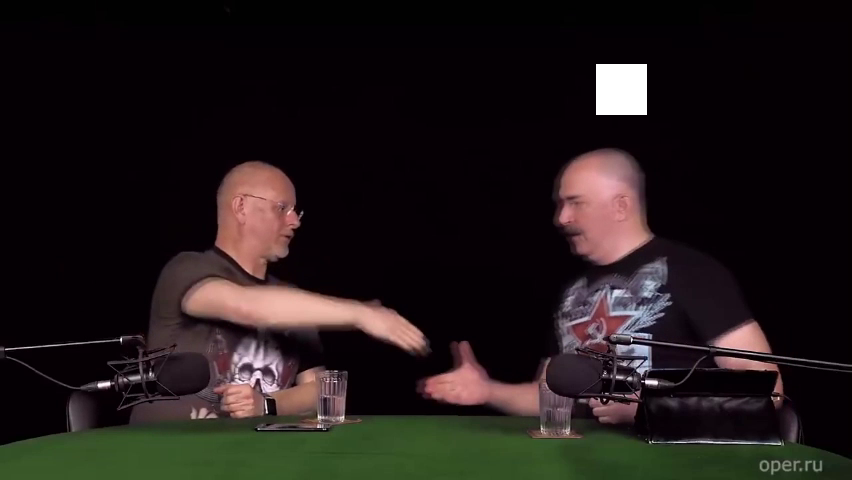

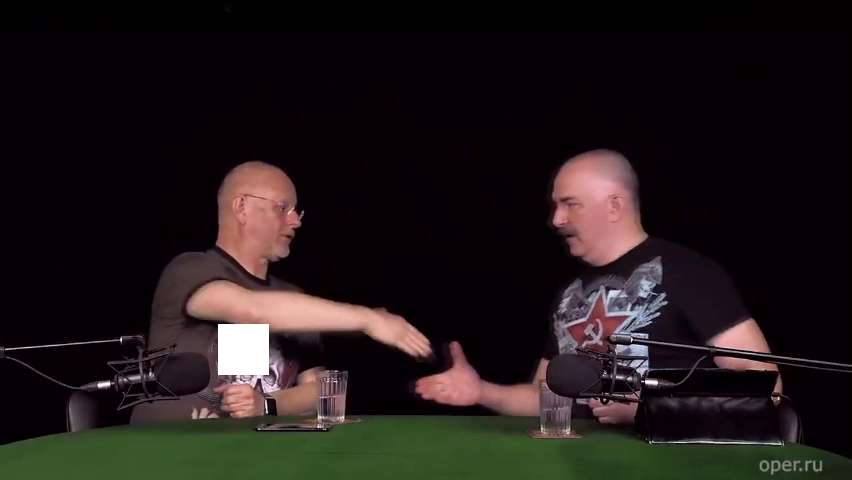

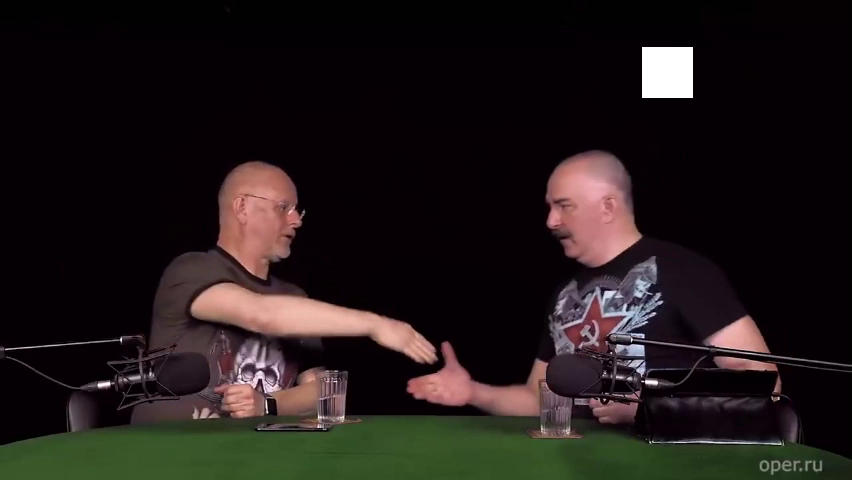

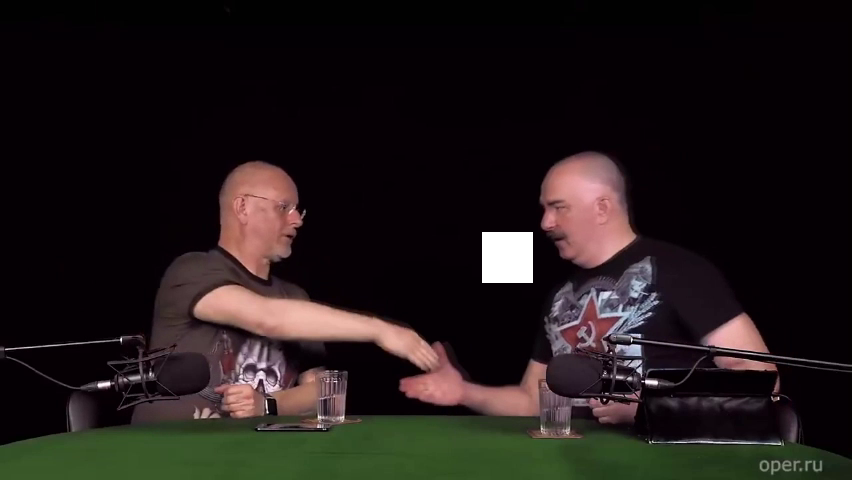

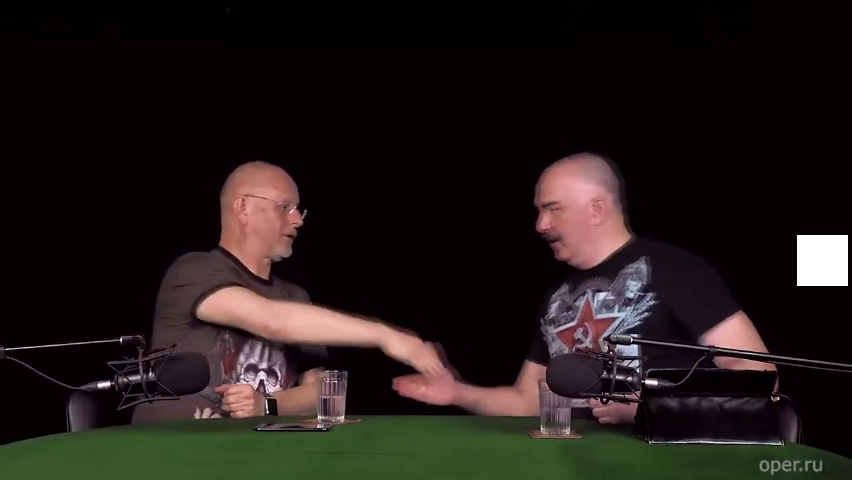

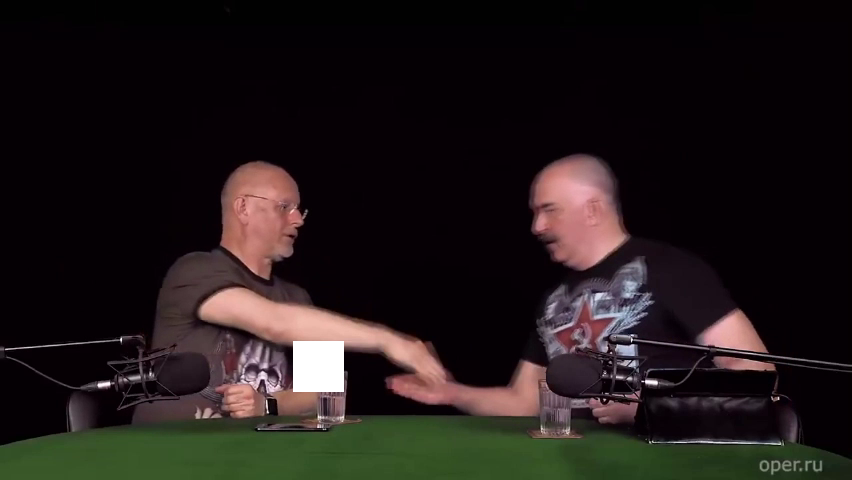

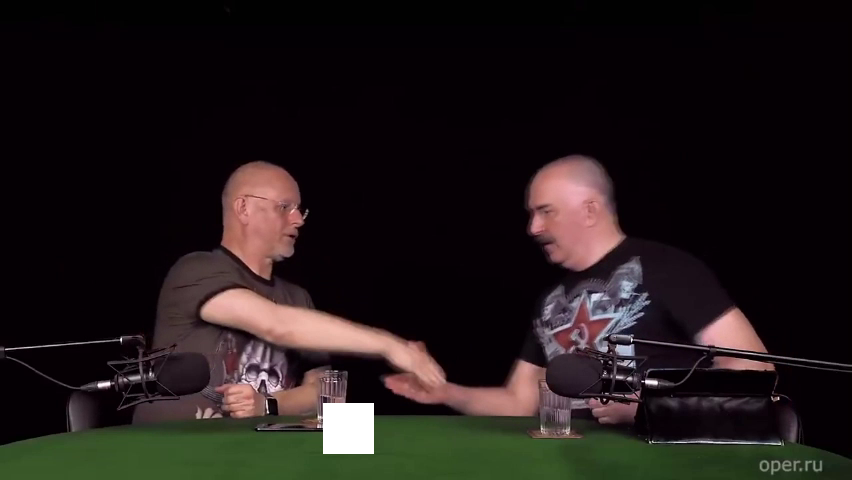

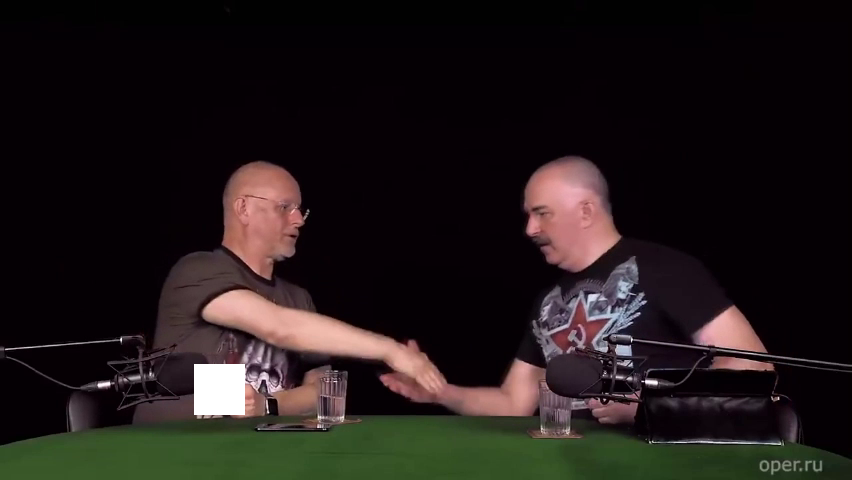

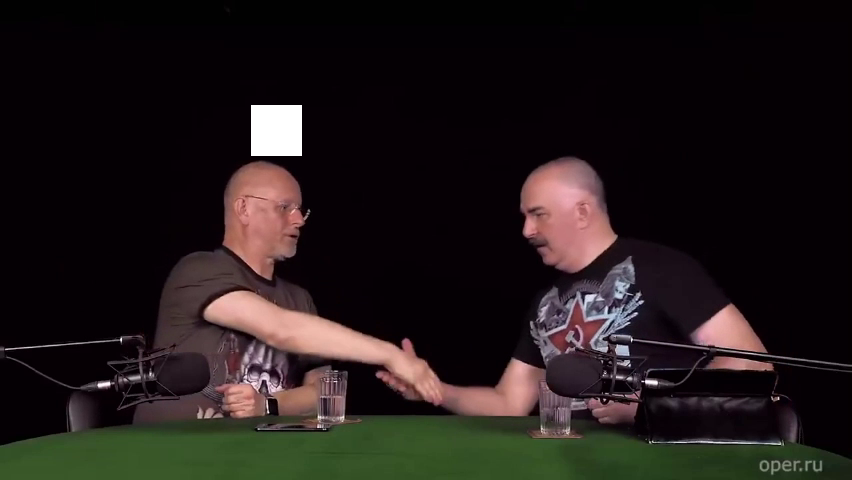

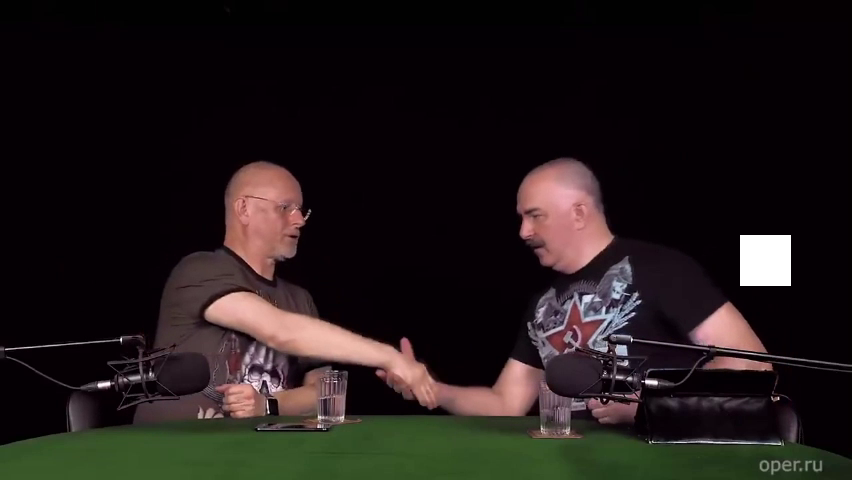

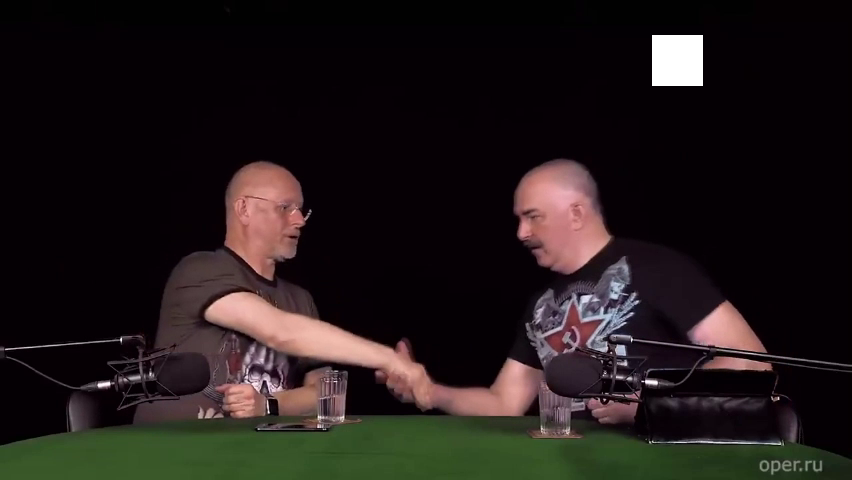

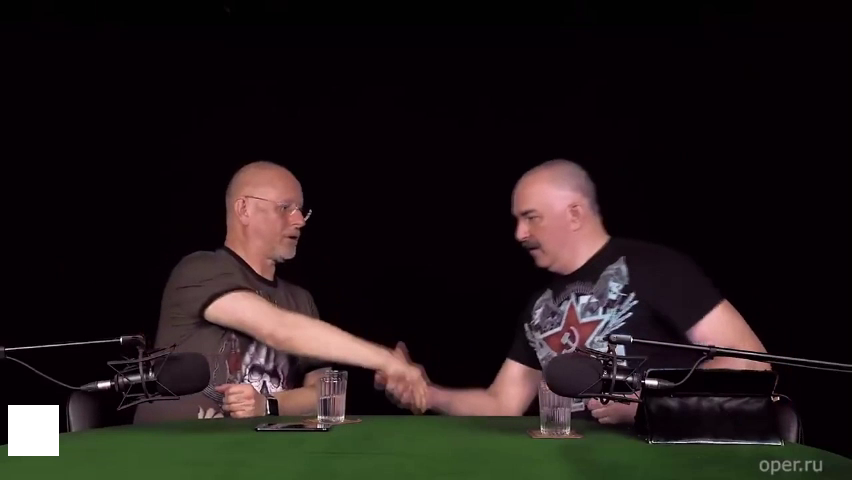

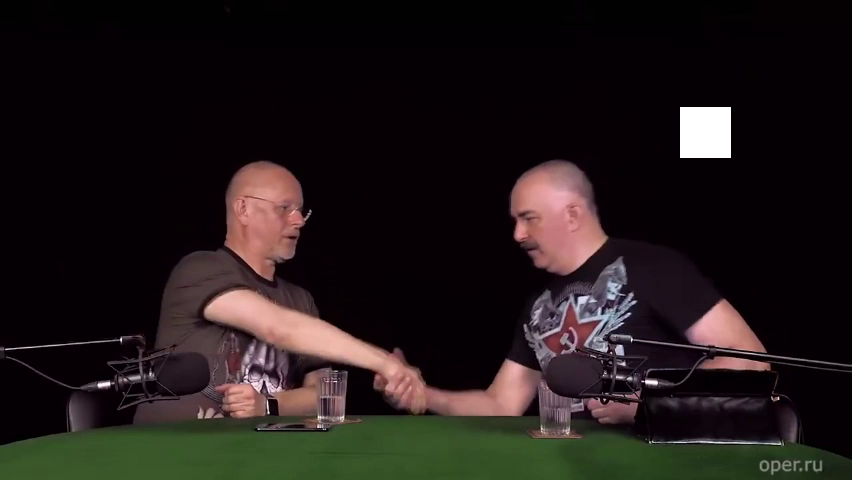

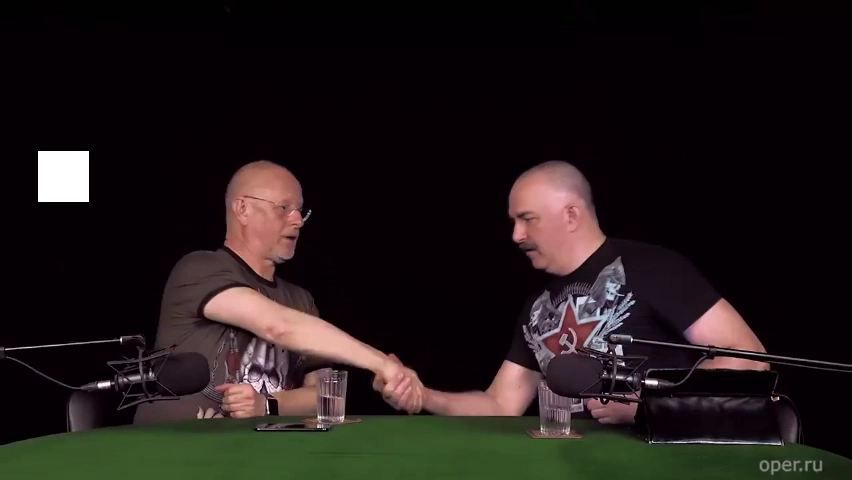

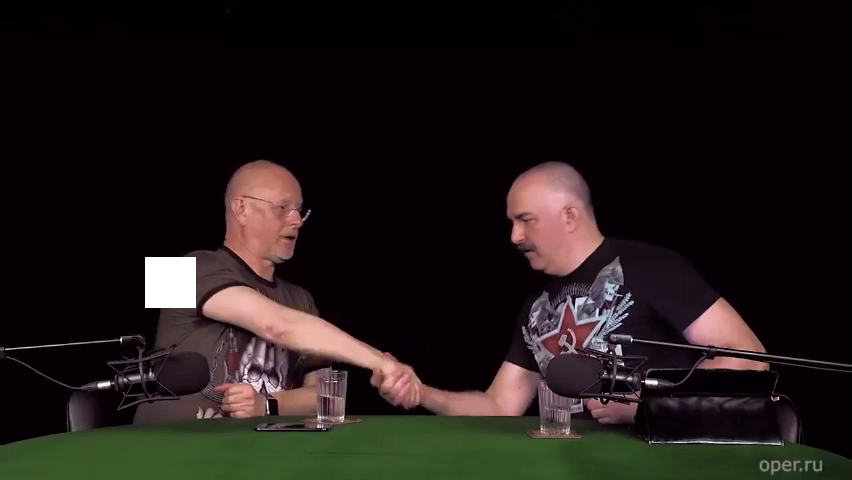

In [19]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

cap = cv2.VideoCapture("Спасибо.mp4")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    h, w, _ = frame.shape
    x = np.random.randint(0, w - 50)
    y = np.random.randint(0, h - 50)

    cv2.rectangle(frame, (x, y), (x + 50, y + 50), (255, 255, 255), -1)
    cv2_imshow(frame)

cap.release()
cv2.destroyAllWindows()


## ДЗ №3

1. Найти в обучающем наборе esc50-dataset WAV файл с лаем собаки;
2. визуально по графику амплитуды звуковой волны найти участок файла непосредственно содержащий звук лая;
3. построить спектрограмму для найденного участка;
4. подумать (и реализовать), как с помощиью цифрового представления звука можно автоматизировать удаление части файла, не содержащего полезной информации.

In [50]:
import numpy as np
import librosa
import soundfile as sf
import io
from urllib.request import urlopen
import IPython.display as ipd

audio_data = 'https://github.com/karolpiczak/ESC-50/raw/master/audio/1-97392-A-0.wav'

data, sample_rate = sf.read(io.BytesIO(urlopen(audio_data).read()))
ipd.Audio(audio_data)

Text(0.5, 1.0, 'График амплитуды звуковой волны')

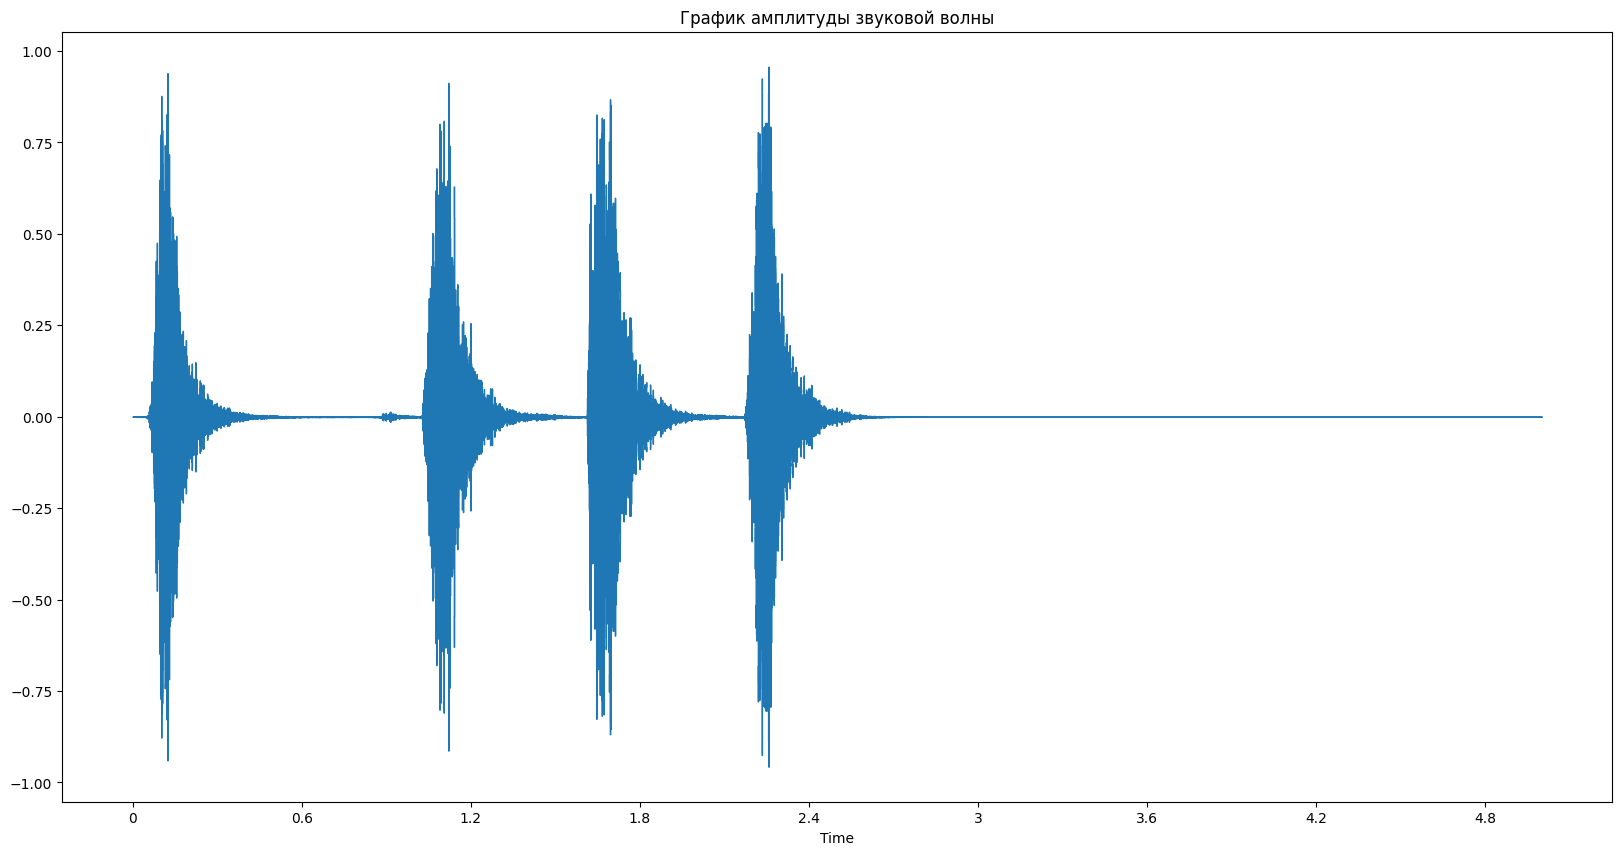

In [26]:
import matplotlib.pyplot as plt
import librosa.display


plt.figure(figsize=(20, 10))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('График амплитуды звуковой волны')

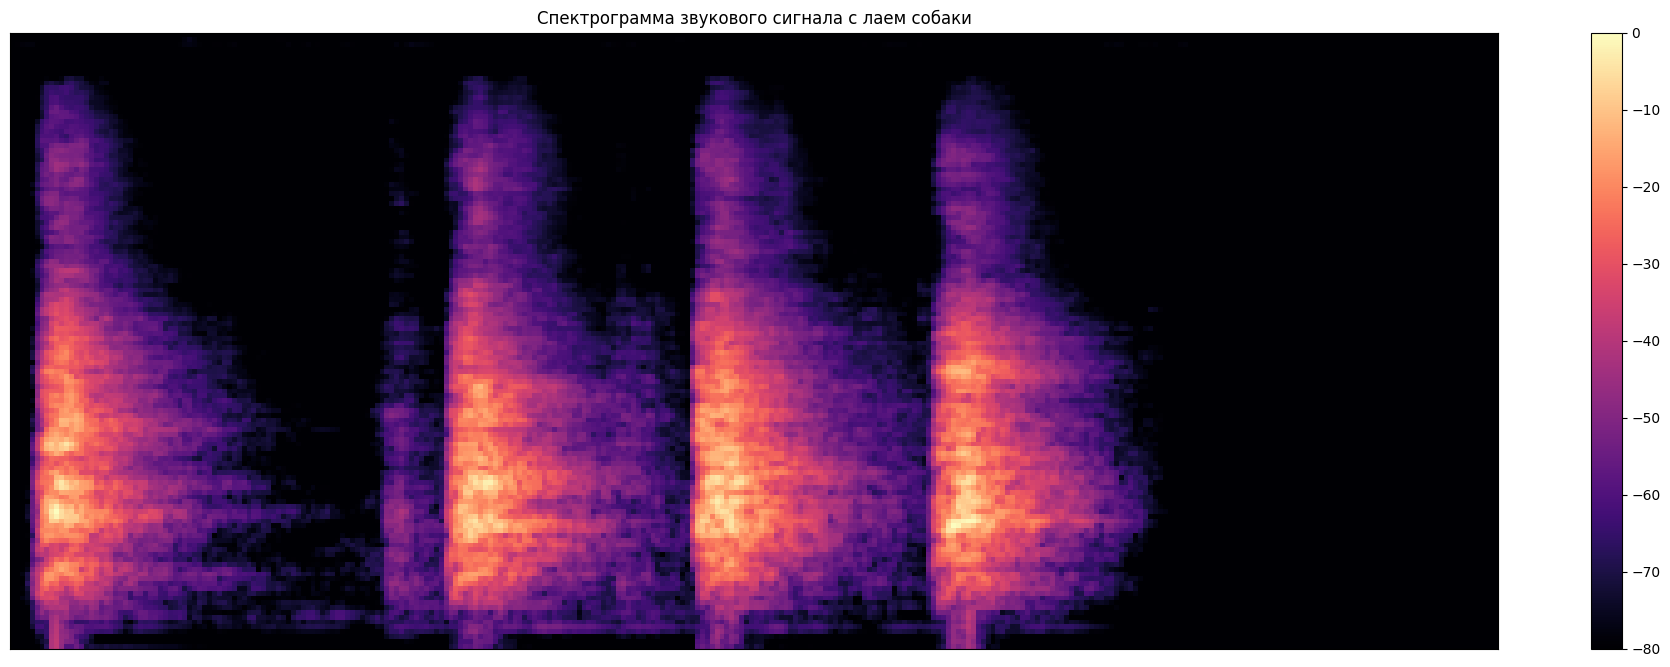

In [58]:
start_time = 0
end_time = 3.5

start_index = int(start_time * sample_rate)
end_index = int(end_time * sample_rate)

dog_segment = data[start_index:end_index]

plt.figure(figsize=(24, 8))
S = librosa.feature.melspectrogram(y=dog_segment, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate)
plt.title('Спектрограмма звукового сигнала с лаем собаки')
plt.colorbar()
plt.show()

In [71]:
volume = np.abs(data)
level = 0.002
mask = volume > level

filtered_data = data[mask]

filtered_audio_path = 'essence_audio.wav'
sf.write(filtered_audio_path, filtered_data, sample_rate)
ipd.Audio(filtered_audio_path)